In [1]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
tf.__version__

'2.6.0'

In [2]:
sampling_rate = '22050'
with open('mfcc_trimmed_'+ sampling_rate + '.npy', 'rb') as f:
    mfcc_trimmed = np.load(f, allow_pickle=True)
    
df_raw = pd.read_csv('RAVDESS_speech.csv')
df_raw.head()

,filePath,emotion,isFemale,actorId
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16


In [3]:
df = df_raw
df['mfcc_trimmed_'+ sampling_rate] = mfcc_trimmed
df.head()

,filePath,emotion,isFemale,actorId,mfcc_trimmed_22050
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-723.22266, -714.97565, -713.3226, -714.5724..."
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-557.34534, -384.11807, -321.34244, -315.224..."
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-538.961, -534.93274, -530.0017, -530.9788, ..."
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-590.68286, -587.66205, -585.7887, -588.7289..."
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16,"[[-826.90735, -811.848, -799.259, -821.14, -72..."


In [4]:
df['mfcc_shape_of_t'] = [ np.shape(x)[1] for x in df.mfcc_trimmed_22050]

In [ ]:
df.head()

,filePath,emotion,isFemale,actorId,mfcc_trimmed_22050,mfcc_shape_of_t
0,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-723.22266, -714.97565, -713.3226, -714.5724...",99
1,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-557.34534, -384.11807, -321.34244, -315.224...",95
2,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,6,True,16,"[[-538.961, -534.93274, -530.0017, -530.9788, ...",130
3,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,5,True,16,"[[-590.68286, -587.66205, -585.7887, -588.7289...",102
4,data/RAVDESS/Audio_Speech_Actors_01-24/Actor_1...,7,True,16,"[[-826.90735, -811.848, -799.259, -821.14, -72...",108


In [5]:
df['mfcc_shape_of_t'].value_counts()

150    32
149    31
156    30
153    28
154    28
       ..
178     1
217     1
70      1
68      1
216     1
Name: mfcc_shape_of_t, Length: 139, dtype: int64

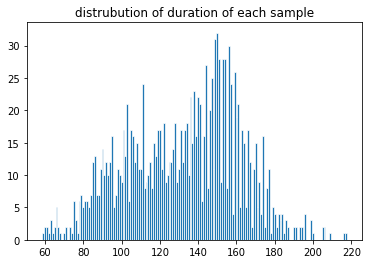

In [ ]:
fig, ax = plt.subplots()

ax.bar(df['mfcc_shape_of_t'].value_counts().index, \
       df['mfcc_shape_of_t'].value_counts().values, \
           width=1, edgecolor="white", linewidth=0.7)

plt.title('distrubution of duration of each sample')
plt.show()

In [6]:
df['mfcc_t'] = [  x.T for x in df.mfcc_trimmed_22050]

In [7]:
import tensorflow.keras
mfcc_pad = tf.keras.preprocessing.sequence.pad_sequences(df.mfcc_t, padding="post")


In [9]:
mfcc_pad.shape

(1440, 217, 13)

In [ ]:
full_ds = tf.data.Dataset.from_tensor_slices((mfcc_pad, df.emotion))

In [ ]:
print('x')

Error: Session cannot generate requests

In [ ]:
TAKE_SIZE = int(0.8*df.shape[0])


Error: Session cannot generate requests

In [ ]:
# Train Test Split

train_data = full_ds.take(TAKE_SIZE).shuffle(TAKE_SIZE)
train_data = train_data.batch(64)

test_data = full_ds.skip(TAKE_SIZE)
test_data = test_data.batch(64)

Error: Session cannot generate requests

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential


model = Sequential()model.add(layers.Conv1D(256, 5,padding='same',
                 input_shape=(236,40)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.2))model.add(layers.Conv1D(128, 5,padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(4)))
model.add(layers.Dropout(0.1))model.add(layers.Flatten())
model.add(layers.Dense(64))
model.add(layers.Dense(7))
model.add(layers.Activation('softmax'))